In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import entropy

### Load data

In [2]:
df = pd.read_csv('myket.csv', index_col=False)

/var/folders/xv/yt1388s53fg1889wfzl2l37r0000gr/T/ipykernel_99493/589920198.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('myket.csv', index_col=False)


In [5]:
df.head(2)

,user_id,app_name,timestamp,state_label,comma_separated_list_of_features
0,-1185417981,com.tencent.ig,0.000,0,0
1,-562407438,com.tencent.iglite,220.347,0,0


In [13]:
df.shape

(694121, 5)

In [7]:
df.describe()

,user_id,timestamp,state_label,comma_separated_list_of_features
count,6.941210e+05,6.941210e+05,694121.0,694121.0
mean,4.520986e+08,8.807382e+06,0.0,0.0
std,1.150719e+09,4.428431e+06,0.0,0.0
min,-2.145673e+09,0.000000e+00,0.0,0.0
25%,-4.963212e+08,5.501648e+06,0.0,0.0
50%,6.506196e+08,8.868693e+06,0.0,0.0
75%,1.400564e+09,1.231573e+07,0.0,0.0
max,2.147059e+09,1.702102e+07,0.0,0.0


# User Statistics

In [19]:
df_gb_user = df.groupby('user_id').count()[['app_name']]
df_gb_user.columns = ['count']
df_gb_user.shape[0]

10000

In [46]:
df_gb_user.describe()

,count
count,10000.00000
mean,69.41210
std,46.41251
min,33.00000
25%,41.00000
50%,54.00000
75%,80.00000
max,1053.00000


Text(0.5, 1.0, 'Distribution of number of apps per user')

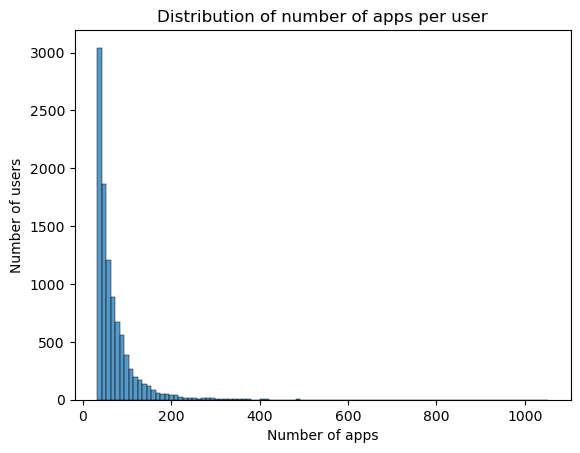

In [15]:
sns.histplot(df_gb_user, x='count', bins=100)
plt.xlabel('Number of apps')
plt.ylabel('Number of users')
plt.title('Distribution of number of apps per user')

# Item Statistical

In [18]:
df_gb_item = df.groupby('app_name').count()[['user_id']]
df_gb_item.columns = ['count']
df_gb_item.shape[0]

7988

In [20]:
df_gb_item.sort_values(by='count', ascending=False).head(20)

,count
app_name,
com.instagram.android,15292
ir.resaneh1.iptv,12143
com.tencent.ig,7919
com.ForgeGames.SpecialForcesGroup2,7797
ir.nomogame.ClutchGame,6193
com.dts.freefireth,6041
com.whatsapp,5876
com.supercell.clashofclans,5817
com.mojang.minecraftpe,5649


In [47]:
df_gb_item.describe()

,count
count,7988.000000
mean,86.895468
std,355.739904
min,1.000000
25%,17.000000
50%,28.000000
75%,61.000000
max,15292.000000


Text(0.5, 1.0, 'Distribution of number of users per app')

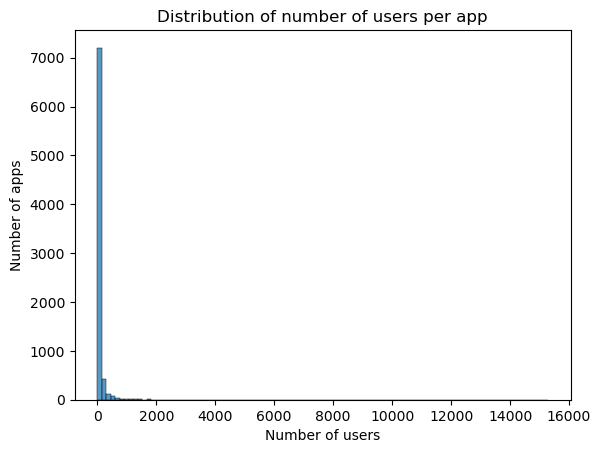

In [16]:
sns.histplot(df_gb_item, x='count', bins=100)
plt.xlabel('Number of users')
plt.ylabel('Number of apps')
plt.title('Distribution of number of users per app')

In [22]:
df_gb_user_set_apps = df.groupby('user_id').agg({'app_name': set})

In [23]:
df_gb_user_set_apps['count_apps'] = df_gb_user_set_apps['app_name'].apply(lambda x: len(x))

In [25]:
df_gb_user_set_apps.describe()

,count_apps
count,10000.000000
mean,54.616400
std,34.261828
min,1.000000
25%,34.000000
50%,44.000000
75%,64.000000
max,665.000000


In [26]:
df_gb_user_list_apps = df.groupby('user_id').agg({'app_name': list})

In [34]:
df_gb_user_list_apps['counts'] = df_gb_user_list_apps['app_name'].apply(lambda x: np.unique(x, return_counts=True)[1])

In [36]:
df_gb_user_list_apps['max'] = df_gb_user_list_apps['counts'].apply(lambda x: np.max(x))
df_gb_user_list_apps['sum'] = df_gb_user_list_apps['counts'].apply(lambda x: np.sum(x))
df_gb_user_list_apps['max_ratio'] = df_gb_user_list_apps['max'] / df_gb_user_list_apps['sum']

In [44]:
df_gb_user_list_apps['entropy'] = df_gb_user_list_apps['counts'].apply(lambda x: entropy(x))

In [45]:
df_gb_user_list_apps.describe()

,max,sum,max_ratio,entropy
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,6.377400,69.41210,0.094500,3.717637
std,12.732336,46.41251,0.113216,0.628398
min,1.000000,33.00000,0.009390,0.000000
25%,2.000000,41.00000,0.043478,3.433935
50%,4.000000,54.00000,0.060606,3.703629
75%,6.000000,80.00000,0.097561,4.067083
max,267.000000,1053.00000,1.000000,6.335596


# Timestamp histogram

/Users/erfan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of timestamp')

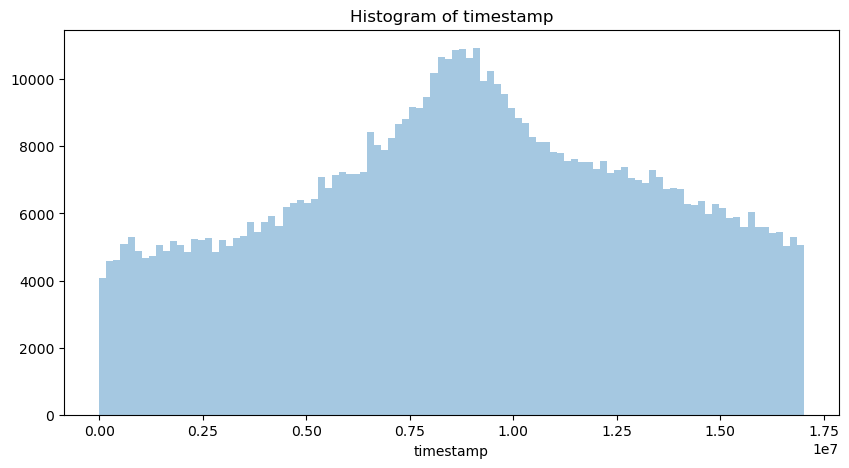

In [6]:
plt.figure(figsize=(10, 5))
sns.distplot(df['timestamp'], bins=100, kde=False)
plt.title('Histogram of timestamp')